# Used Car Price Prediction Project

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

In [1]:
# Importing Required Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
#Importing the collected data

df = pd.read_csv('used_cars.csv') 

In [3]:
df

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
0,2021,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"8,387 km",PetrolUP-14,1st Owner,"₹9,43,799"
1,2020,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"18,028 km",PetrolDL-10,1st Owner,"₹8,92,649"
2,2022,Mahindra,XUV 3OO 1.2 W6 AT,NaN,"21,859 km",PetrolDL-1C,1st Owner,"₹10,50,499"
3,2018,Mahindra,KUV 100 NXT K6+ 6 STR,Manual,"64,684 km",Petrol + CNGHR-02,1st Owner,"₹3,94,999"
4,2018,Mahindra,KUV 100 NXT K2 D 6S,Manual,"65,179 km",DieselDL-10,1st Owner,"₹4,54,599"
...,...,...,...,...,...,...,...,...
6234,2015,Hyundai,Elite i20 ASTA 1.2,Manual,"40,969 km",PetrolDL-3C,1st Owner,"₹5,65,099"
6235,2019,Maruti,XL6 ZETA SHVS,Manual,"37,577 km",PetrolDL-5C,1st Owner,"₹8,61,599"
6236,2015,Hyundai,Elite i20 ASTA 1.2,Manual,"67,114 km",PetrolDL-8C,1st Owner,"₹4,75,399"
6237,2021,Maruti,XL6 ZETA SHVS,Manual,"36,728 km",PetrolUP-32,1st Owner,"₹9,94,299"


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6239 entries, 0 to 6238
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MNF_YEAR     6239 non-null   int64 
 1   BRAND        6239 non-null   object
 2   MODEL        6239 non-null   object
 3   VARIANT      5987 non-null   object
 4   DRIVEN_KM    6239 non-null   object
 5   FUELTYPE     6239 non-null   object
 6   NOOF_OWNERS  6239 non-null   object
 7   PRICE        6239 non-null   object
dtypes: int64(1), object(7)
memory usage: 390.1+ KB


In [5]:
df.isnull().sum().sum()

252

In [6]:
df.isnull().sum()

MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT        252
DRIVEN_KM        0
FUELTYPE         0
NOOF_OWNERS      0
PRICE            0
dtype: int64

We can see that there are many null values in "Variant" Column

In [7]:
df.nunique()

MNF_YEAR         14
BRAND            20
MODEL           748
VARIANT           2
DRIVEN_KM      2800
FUELTYPE        450
NOOF_OWNERS       3
PRICE          2451
dtype: int64

In [8]:
df.FUELTYPE.unique()

array(['PetrolUP-14', 'PetrolDL-10', 'PetrolDL-1C', 'Petrol + CNGHR-02',
       'DieselDL-10', 'DieselDL-12', 'DieselHR-10', 'DieselUP-16',
       'DieselDL-3C', 'PetrolDL-12', 'DieselHR-26', 'DieselUP-14',
       'PetrolDL-5C', 'PetrolUP-85', 'PetrolDL-8C', 'PetrolDL-11',
       'PetrolHR-26', 'DieselDL-8C', 'DieselHR-51', 'PetrolDL-9C',
       'PetrolDL-7C', 'DieselUP-15', 'PetrolDL-3C', 'PetrolDL-4C',
       'PetrolDL-6C', 'DieselUP-32', 'PetrolDL-13', 'PetrolUP-32',
       'PetrolHR-51', 'PetrolUP-16', 'PetrolDL-14', 'PetrolHR-85',
       'DieselDL-5C', 'Petrol + CNGHR-26', 'PetrolHR-50',
       'Petrol + CNGDL-3C', 'PetrolHR-29', 'Petrol + CNGDL-10',
       'Petrol + CNGHR-51', 'PetrolHR-14', 'Petrol + CNGHR-30',
       'DieselHR-29', 'PetrolUP-15', 'PetrolHR-36', 'DieselDL-14',
       'PetrolHR-42', 'DieselHR-36', 'PetrolHR-87', 'Petrol + CNGDL-9C',
       'PetrolHR-03', 'PetrolHR-98', 'PetrolDL-2C', 'DieselUP-70',
       'DieselDL-1C', 'DieselDL-2C', 'PetrolUP-65', 'DieselDL-7C'

In [9]:
FUEL=[]
for i in df.FUELTYPE:
    size=len(i)
    FUEL.append(i[:size-5])

In [14]:
len(FUEL) , len(df.FUELTYPE)

(6239, 6239)

In [19]:
df=df.assign(FUEL=FUEL)

In [25]:
df=df.drop(['FUELTYPE'],axis=1)

In [26]:
df

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,NOOF_OWNERS,PRICE,FUEL
0,2021,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"8,387 km",1st Owner,"₹9,43,799",Petrol
1,2020,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"18,028 km",1st Owner,"₹8,92,649",Petrol
2,2022,Mahindra,XUV 3OO 1.2 W6 AT,NaN,"21,859 km",1st Owner,"₹10,50,499",Petrol
3,2018,Mahindra,KUV 100 NXT K6+ 6 STR,Manual,"64,684 km",1st Owner,"₹3,94,999",Petrol + CNG
4,2018,Mahindra,KUV 100 NXT K2 D 6S,Manual,"65,179 km",1st Owner,"₹4,54,599",Diesel
...,...,...,...,...,...,...,...,...
6234,2015,Hyundai,Elite i20 ASTA 1.2,Manual,"40,969 km",1st Owner,"₹5,65,099",Petrol
6235,2019,Maruti,XL6 ZETA SHVS,Manual,"37,577 km",1st Owner,"₹8,61,599",Petrol
6236,2015,Hyundai,Elite i20 ASTA 1.2,Manual,"67,114 km",1st Owner,"₹4,75,399",Petrol
6237,2021,Maruti,XL6 ZETA SHVS,Manual,"36,728 km",1st Owner,"₹9,94,299",Petrol


In [27]:
df.rename(columns = {'FUEL':'FUELTYPE'}, inplace = True)

In [28]:
df

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,NOOF_OWNERS,PRICE,FUELTYPE
0,2021,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"8,387 km",1st Owner,"₹9,43,799",Petrol
1,2020,Mahindra,XUV 3OO 1.2 W6 MT,NaN,"18,028 km",1st Owner,"₹8,92,649",Petrol
2,2022,Mahindra,XUV 3OO 1.2 W6 AT,NaN,"21,859 km",1st Owner,"₹10,50,499",Petrol
3,2018,Mahindra,KUV 100 NXT K6+ 6 STR,Manual,"64,684 km",1st Owner,"₹3,94,999",Petrol + CNG
4,2018,Mahindra,KUV 100 NXT K2 D 6S,Manual,"65,179 km",1st Owner,"₹4,54,599",Diesel
...,...,...,...,...,...,...,...,...
6234,2015,Hyundai,Elite i20 ASTA 1.2,Manual,"40,969 km",1st Owner,"₹5,65,099",Petrol
6235,2019,Maruti,XL6 ZETA SHVS,Manual,"37,577 km",1st Owner,"₹8,61,599",Petrol
6236,2015,Hyundai,Elite i20 ASTA 1.2,Manual,"67,114 km",1st Owner,"₹4,75,399",Petrol
6237,2021,Maruti,XL6 ZETA SHVS,Manual,"36,728 km",1st Owner,"₹9,94,299",Petrol


In [29]:
df.MNF_YEAR.unique()

array([2021, 2020, 2022, 2018, 2015, 2019, 2016, 2017, 2014, 2009, 2013,
       2012, 2011, 2010], dtype=int64)

In [30]:
df.BRAND.unique()

array(['Mahindra', 'Ford', 'Hyundai', 'Tata', 'Maruti', 'Renault', 'KIA',
       'Honda', 'Volkswagen', 'Toyota', 'Skoda', 'Audi', 'Mercedes',
       'Jeep', 'MG', 'Nissan', 'BMW', 'Datsun', 'MARUTI', 'SKODA'],
      dtype=object)

In [31]:
df.VARIANT.unique()

array([nan, 'Manual', 'Automatic'], dtype=object)

In [32]:
df.NOOF_OWNERS.unique()

array(['1st Owner', '2nd Owner', '3rd Owner'], dtype=object)

In [33]:
df.duplicated().sum()

3387

In [34]:
#Because we have too many duplicate records we will detete them to have a good model

df = df.drop_duplicates()

In [35]:
df.shape

(2852, 8)

From above we can see that the only in VARIANT we have values missing so we will change VARIANT nan values as NOT MENTIONED

In [36]:
df['VARIANT'] = df['VARIANT'].fillna('NOT MENTIONED')

In [37]:
df.isnull().sum()

MNF_YEAR       0
BRAND          0
MODEL          0
VARIANT        0
DRIVEN_KM      0
NOOF_OWNERS    0
PRICE          0
FUELTYPE       0
dtype: int64

### Lable Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()

In [39]:
DF = df.copy()

In [40]:
catagorical_data = [ 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'FUELTYPE' , 'NOOF_OWNERS' ]

for i in catagorical_data:
    DF[i]=DF[i].astype('str')
    DF[i]=LE.fit_transform(DF[i])

In [41]:
DF['PRICE'] = DF['PRICE'].str.replace(r'\D', '').astype(int)
DF['DRIVEN_KM'] = DF['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

In [42]:
DF

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,NOOF_OWNERS,PRICE,FUELTYPE
0,12,10,692,2,8387,0,943799,1
1,11,10,692,2,18028,0,892649,1
2,13,10,691,2,21859,0,1050499,1
3,9,10,370,1,64684,0,394999,2
4,9,10,367,1,65179,0,454599,0
...,...,...,...,...,...,...,...,...
5712,7,11,665,1,57045,0,692099,0
5726,11,9,319,1,77384,0,1641499,0
5865,11,4,43,0,49437,0,748399,1
5866,5,11,537,1,58920,0,386899,1


In [43]:
DF.describe()

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,NOOF_OWNERS,PRICE,FUELTYPE
count,2852.000000,2852.000000,2852.000000,2852.000000,2852.00000,2852.000000,2.852000e+03,2852.000000
mean,8.978962,9.519635,337.093969,0.829593,40604.47791,0.231767,7.628008e+05,0.832749
std,2.390700,4.448383,229.153608,0.472009,26853.60534,0.459439,3.830175e+05,0.446044
min,0.000000,0.000000,0.000000,0.000000,188.00000,0.000000,1.836990e+05,0.000000
25%,8.000000,5.000000,132.000000,1.000000,19100.75000,0.000000,4.907490e+05,1.000000
50%,9.000000,11.000000,307.000000,1.000000,37430.00000,0.000000,6.611490e+05,1.000000
75%,11.000000,11.000000,555.000000,1.000000,57734.75000,0.000000,9.404740e+05,1.000000
max,13.000000,19.000000,747.000000,2.000000,353693.00000,2.000000,2.989899e+06,2.000000


In [44]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2852 entries, 0 to 5934
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   MNF_YEAR     2852 non-null   int32
 1   BRAND        2852 non-null   int32
 2   MODEL        2852 non-null   int32
 3   VARIANT      2852 non-null   int32
 4   DRIVEN_KM    2852 non-null   int32
 5   NOOF_OWNERS  2852 non-null   int32
 6   PRICE        2852 non-null   int32
 7   FUELTYPE     2852 non-null   int32
dtypes: int32(8)
memory usage: 111.4 KB


Now it our all columns are of Dtype are of "int32" , and we do not have any NULL values .

Hence we can see that our data is proper and ready for ML Models

In [48]:
DF.FUELTYPE.unique().sum()

3

### Correlation of the Data

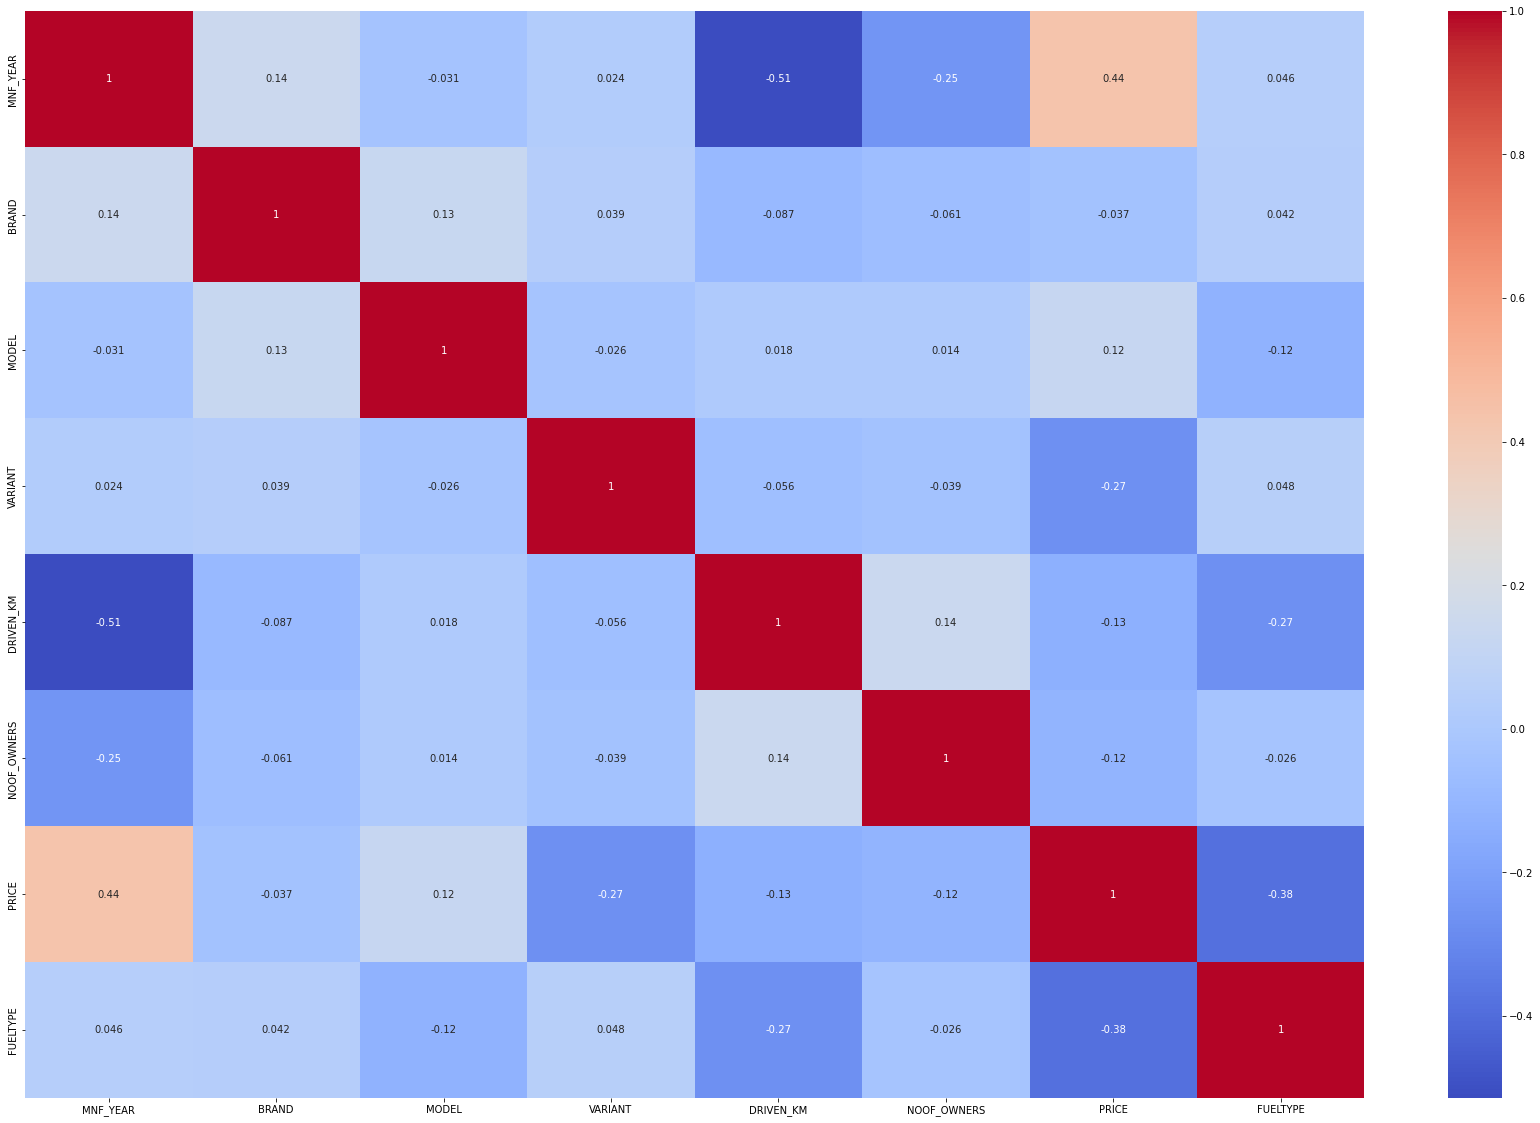

In [49]:
plt.figure(figsize=(30,20))
sns.heatmap(DF.corr(), annot = True, cmap= "coolwarm")
plt.show()

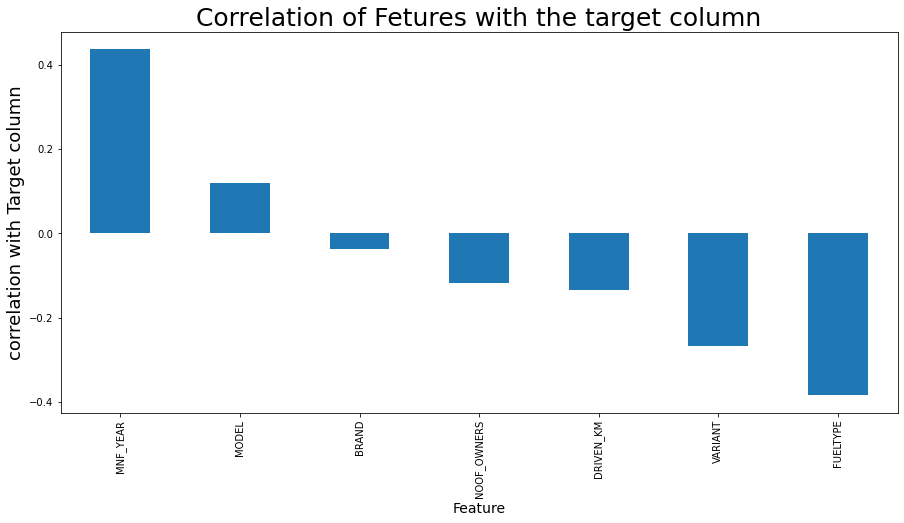

KEY OBSERVATIONS:
 


,PRICE
MNF_YEAR,0.437520
MODEL,0.120099
BRAND,-0.036504
NOOF_OWNERS,-0.117095
DRIVEN_KM,-0.134031
VARIANT,-0.268643
FUELTYPE,-0.384781


In [50]:
plt.figure(figsize=(15,7))
DF.corr()["PRICE"].sort_values(ascending=False).drop(["PRICE"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(DF.corr()["PRICE"].sort_values(ascending=False)).drop(["PRICE"])
print("KEY OBSERVATIONS:\n ")
cor

From above we can clearly see that MNF_YEAR is postivly correlated to PRICE. 

Whereas, FUEL_TYPE and VARIENT is negative corelated to PRICE

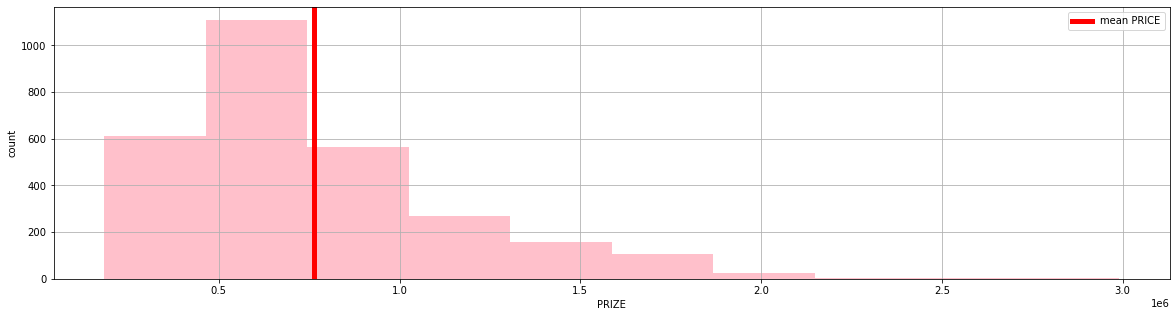

MATHEMATICAL SUMMARY OF PRIZE :
 count    2.852000e+03
mean     7.628008e+05
std      3.830175e+05
min      1.836990e+05
25%      4.907490e+05
50%      6.611490e+05
75%      9.404740e+05
max      2.989899e+06
Name: PRICE, dtype: float64


In [51]:
DF.PRICE.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.PRICE), linewidth = 5, color = "red", label = "mean PRICE")
plt.xlabel("PRIZE")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.PRICE.describe())

Mean of the prize is Rs:762800 , the prize is distributed between Rs:183699 to Rs: 2989899.
            
            
Above we can understand that most of the Car price is leser than the Mean i.e Rs:762800.

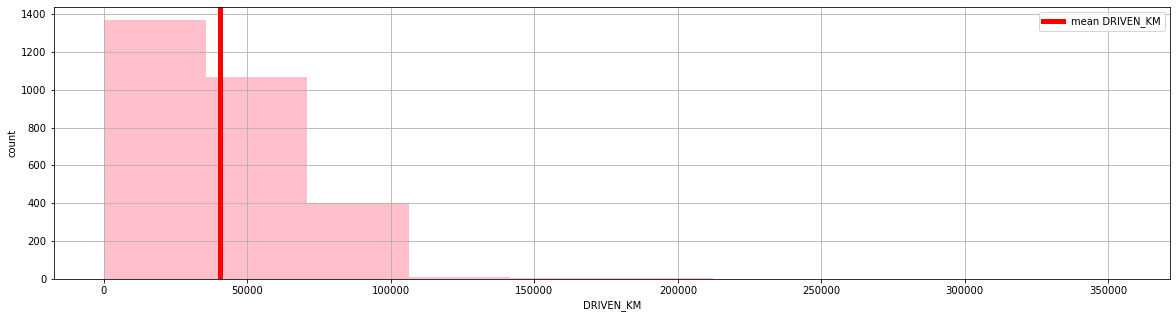

MATHEMATICAL SUMMARY OF PRIZE :
 count      2852.00000
mean      40604.47791
std       26853.60534
min         188.00000
25%       19100.75000
50%       37430.00000
75%       57734.75000
max      353693.00000
Name: DRIVEN_KM, dtype: float64


In [52]:
DF.DRIVEN_KM.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(DF.DRIVEN_KM), linewidth = 5, color = "red", label = "mean DRIVEN_KM")
plt.xlabel("DRIVEN_KM")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      DF.DRIVEN_KM.describe())

Mean of the DRIVEN_KM is 40604.47kms and the maximum KMS driven is 353693.00kms.


Above we can understand that most of the Car comes to sellimg around low kilometers driven.

In [53]:
DF1 = df.copy()

In [54]:
DF1['PRICE'] = DF1['PRICE'].str.replace(r'\D', '').astype(int)
DF1['DRIVEN_KM'] = DF1['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

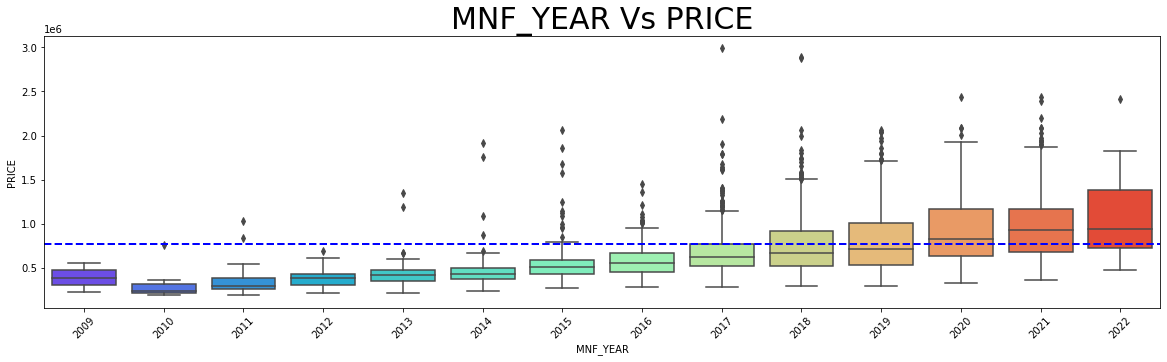

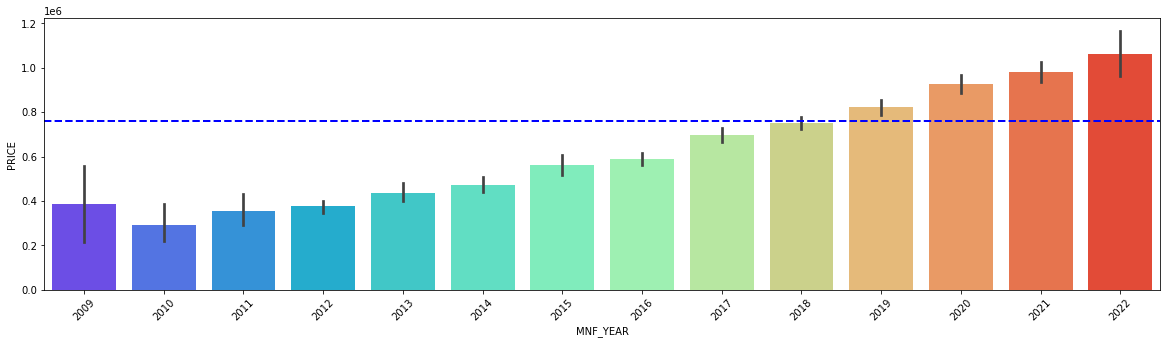

In [55]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("MNF_YEAR Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "MNF_YEAR",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

2019, 2020, 2021 , 2022 model are being sold higher in PRICE and also above average PRICE.

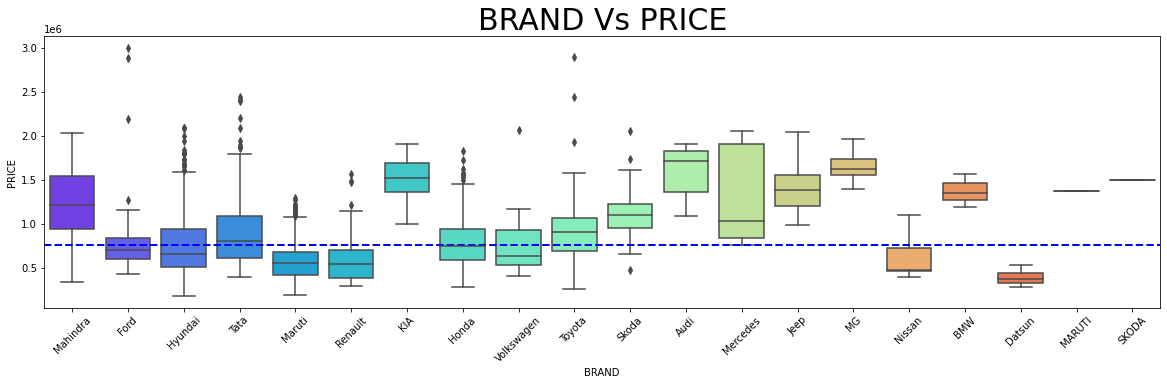

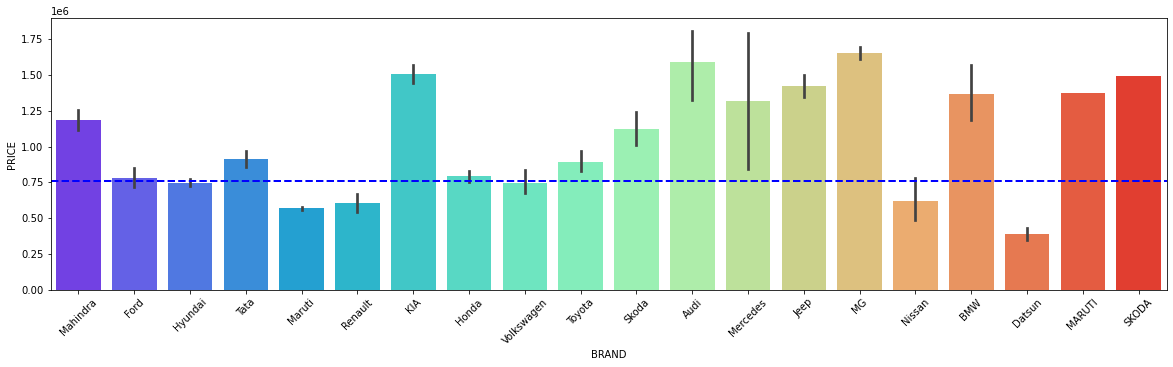

In [56]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("BRAND Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "BRAND",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

When comes to the Brand MG and Audi are being the costliest in country followed by the likes of BMW , KIA , Jeep etc .

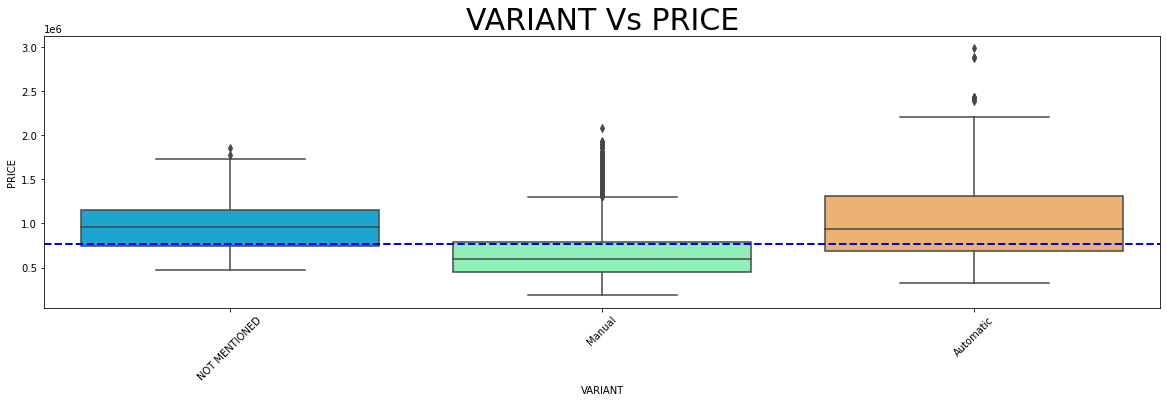

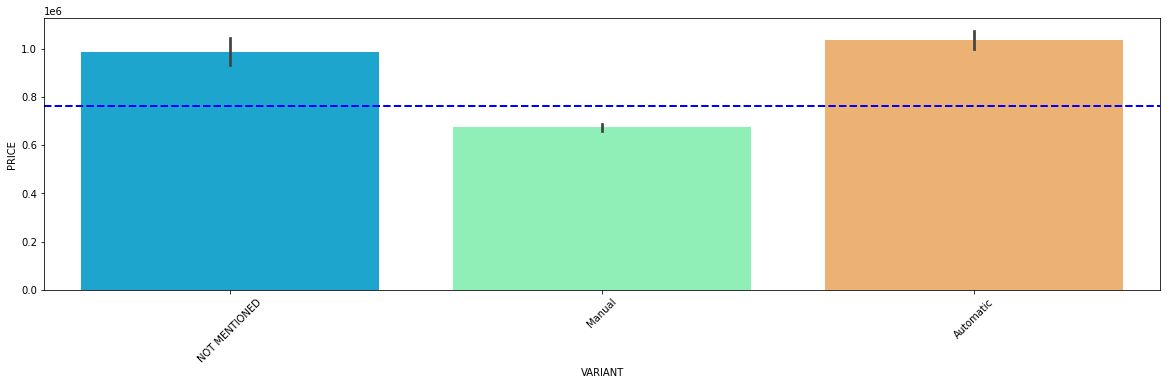

In [57]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("VARIANT Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "VARIANT",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

We can see that the automatic engines are costliest in the market. And also most costilier cars comes in Automatic Drift.

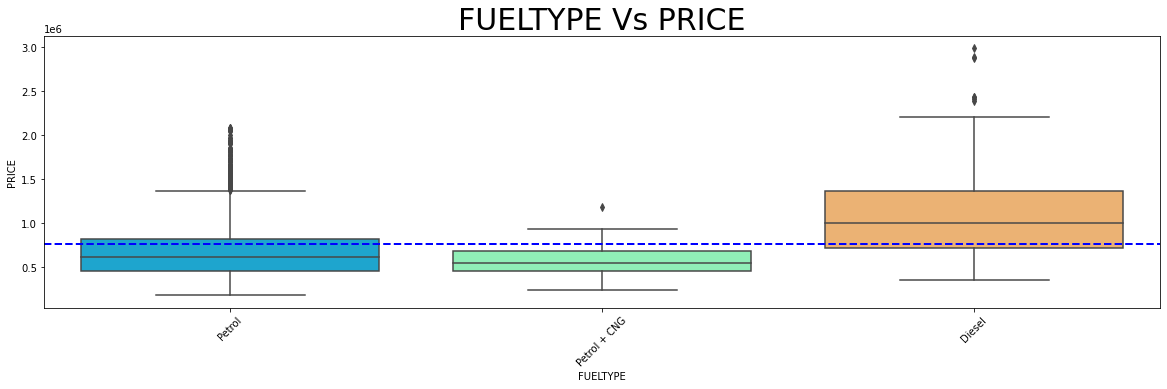

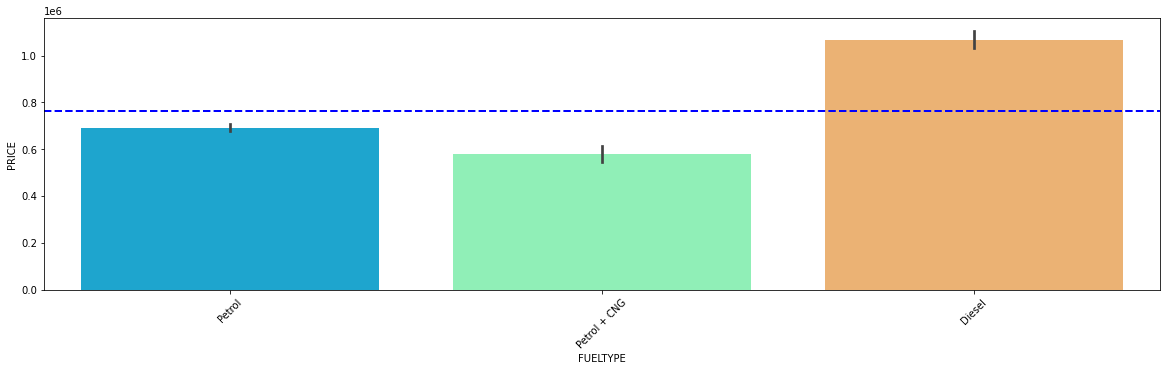

In [58]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("FUELTYPE Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "FUELTYPE",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

Diesel being the chepeast and most efficient fuel type, and so the Desiel engines are being the costiliest fuel types.

Petrol bend second prefered followed by CNG and LPG fuel types.

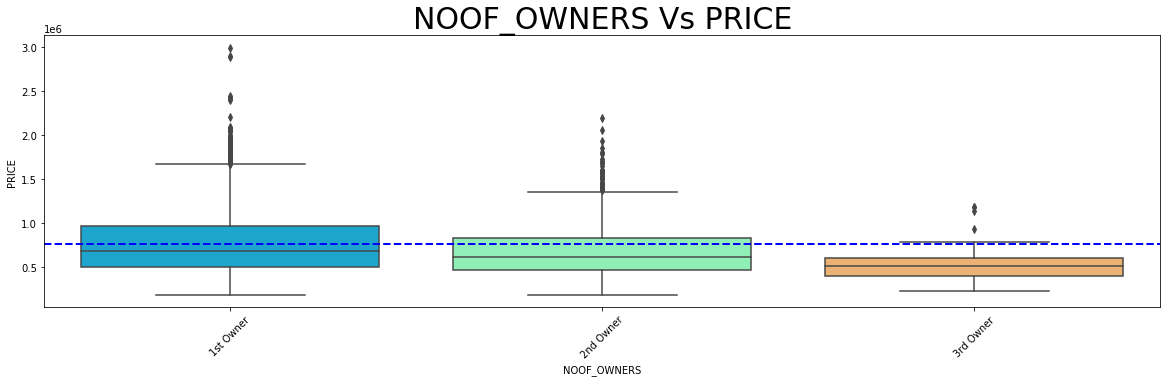

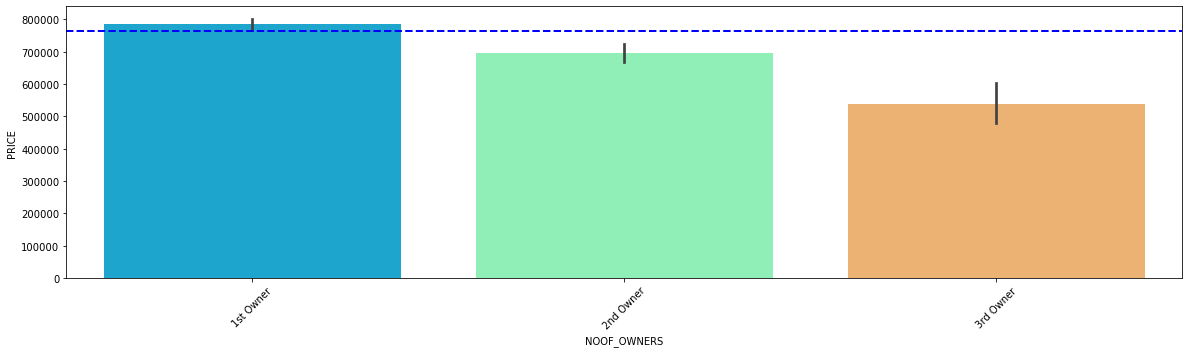

In [59]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.boxplot(x = "NOOF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("NOOF_OWNERS Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "NOOF_OWNERS",y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

1st owner cars are costilest followed by second and third.

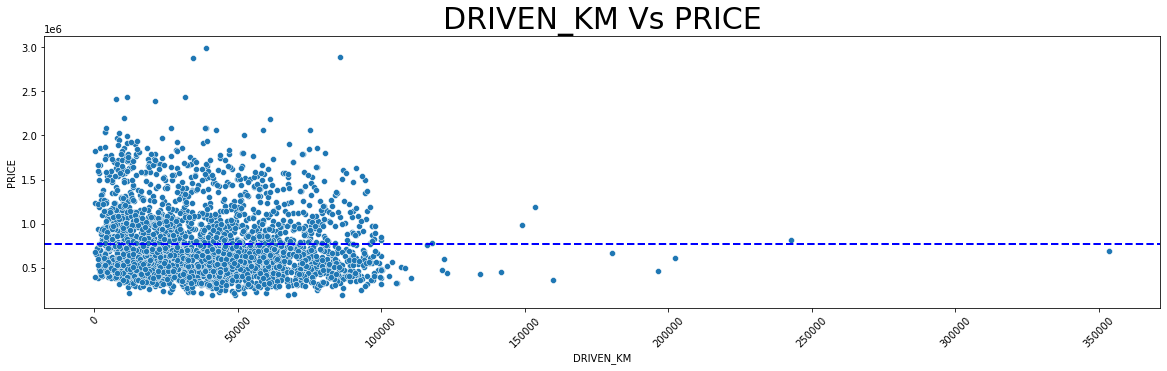

In [60]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(DF.PRICE)
sns.scatterplot(x = 'DRIVEN_KM',y = "PRICE", data = DF1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("DRIVEN_KM Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

The lesser kms driven are evidently sold costilier.

## Data Pre-Processing.

### Lets observe the skewness and outliers in the Data.

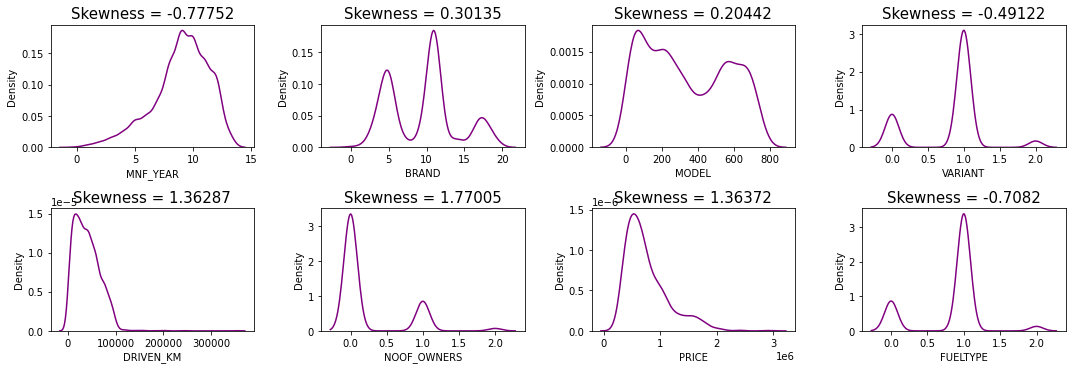

In [62]:
plt.figure(figsize=(15,15))
for i in range (0, len(DF.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(DF[DF.columns[i]], color = "purple")
    plt.title(f"Skewness = {round(DF[DF.columns[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()

Lets also see the Outliers mathematically.

In [63]:
from scipy.stats import zscore

z= np.abs(zscore(DF))
threshold= 3
df_new = DF[(z < 3).all(axis=1)]

In [64]:
print(f"Orginal Data {DF.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((8308-7765)/8308)*100}%")

Orginal Data (2852, 8)
After Removing outliers (2753, 8)
The percentage of data loss 6.535869041887338%


We have many outliers and we also have skewness in the data. Because its more, correcting them will have loss in the data orr data will be deformed. So we are deciding to work with the same.

In [65]:
x_1=DF.drop(["PRICE"], axis = 1)
y_1=DF.PRICE

In [66]:
x_1

,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,NOOF_OWNERS,FUELTYPE
0,12,10,692,2,8387,0,1
1,11,10,692,2,18028,0,1
2,13,10,691,2,21859,0,1
3,9,10,370,1,64684,0,2
4,9,10,367,1,65179,0,0
...,...,...,...,...,...,...,...
5712,7,11,665,1,57045,0,0
5726,11,9,319,1,77384,0,0
5865,11,4,43,0,49437,0,1
5866,5,11,537,1,58920,0,1


In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_1 = sc.fit_transform(x_1)

# Model Building

## Selecting parameters for training

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 49.84533910881371 found on randomstate 504


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [70]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

### Shortlisting the best model

In [71]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegressor"]

In [72]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]


for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.41678357308975833

ERROR:
MEAN ABSOLUTE ERROR:  212441.30091058987
MEAN SQUARED ERROR:  77374341693.84752
ROOT MEAN SQUARED ERROR : 278162.4376040869
R2 SCORE:  0.49845339108813713
**********************************************************************************************************



Score of Lasso() is: 0.4167835730421211

ERROR:
MEAN ABSOLUTE ERROR:  212441.13108123204
MEAN SQUARED ERROR:  77374423288.48212
ROOT MEAN SQUARED ERROR : 278162.5842712893
R2 SCORE:  0.4984528621852554
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.41678346267810495

ERROR:
MEAN ABSOLUTE ERROR:  212431.8616750769
MEAN SQUARED ERROR:  77377952758.13142
ROOT MEAN SQUARED ERROR : 278168.9284555905
R2 SCORE:  0.49842998388354565
**********************************************************************************************************



Score of ElasticNet() is: 

In [73]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [0.44606306 0.42987882 0.44825513 0.44665703 0.25290318]
MEAN OF SCORE is : 0.40475144313237194
Standard Deviation : 0.07621624453402606
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [0.44606252 0.42987925 0.44825603 0.44665689 0.25290263]
MEAN OF SCORE is : 0.4047514634546598
Standard Deviation : 0.07621651865583304
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [0.4460614  0.42993466 0.44831896 0.44660721 0.25289482]
MEAN OF SCORE is : 0.40476341119010845
Standard Deviation : 0.07622489622213159
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.3900252  0.40233411 0.42226198 0.37390263 0.21178578]
MEAN OF SCO

In [74]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
8,RandomForestRegressor,0.979314,0.841111,0.015778,84026.630210,2.064815e+10,143694.632216,0.866157
6,DecisionTreeRegressor,1.000000,0.730536,0.046780,106765.739130,4.028384e+10,200708.340982,0.738877
5,KNeighborsRegressor,0.783535,0.645154,0.007712,149230.757363,5.076580e+10,225312.676994,0.670932
2,Ridge,0.416783,0.404763,0.076225,212431.861675,7.737795e+10,278168.928456,0.498430
1,Lasso,0.416784,0.404751,0.076217,212441.131081,7.737442e+10,278162.584271,0.498453
0,LinearRegression,0.416784,0.404751,0.076216,212441.300911,7.737434e+10,278162.437604,0.498453
7,AdaBoostRegressor,0.357893,0.364234,0.151647,256851.710333,9.162189e+10,302691.083921,0.406100
3,ElasticNet,0.367546,0.360062,0.075804,221929.688231,8.828648e+10,297130.416271,0.427720
4,SVR,-0.062405,-0.093185,0.048456,286877.591140,1.630589e+11,403805.551205,-0.056961


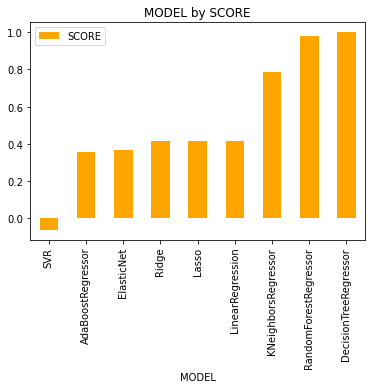

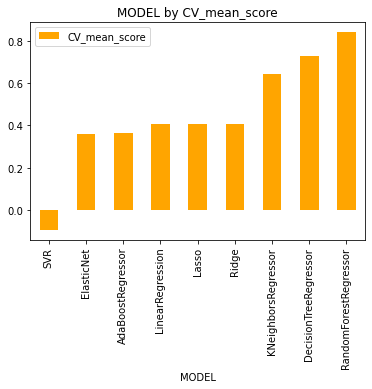

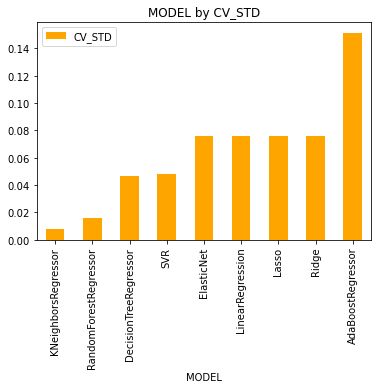

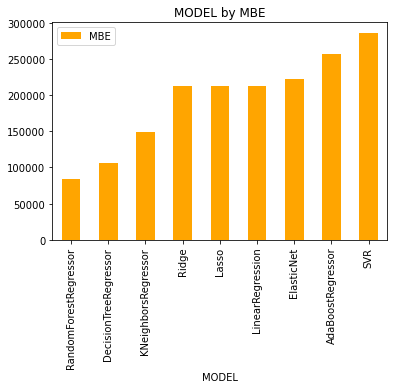

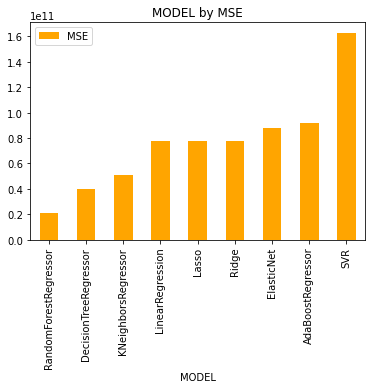

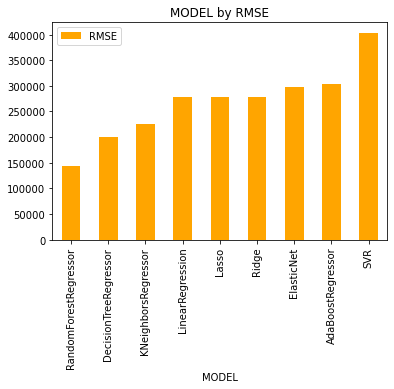

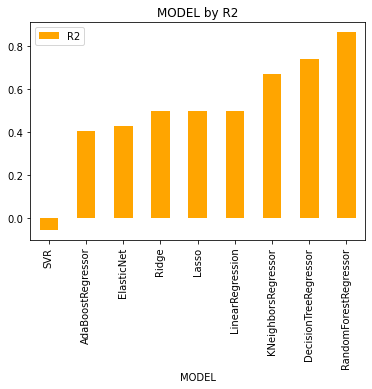

In [75]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()

From above observation, we can come to a conclusion that Randomforest is the best model with Score of 98.78 lets try in Hyper tuning the same for improved performance and also to reduce the over fitting the Data.

In [76]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

763180.9962739599

In [77]:
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [78]:

predm=rf.predict(x_test)

In [79]:
predm

array([ 830131.  ,  489254.  ,  509113.  ,  345937.  ,  502948.  ,
        397386.  ,  707794.2 ,  835886.  ,  623161.  ,  292136.  ,
        429887.  ,  454086.  ,  329642.  , 1504406.  ,  820426.  ,
        898699.8 , 1773491.  ,  390131.  , 1037783.  , 1078239.  ,
        817831.  , 1015309.4 , 1518845.  ,  607980.5 ,  416177.5 ,
        438867.  ,  393796.5 ,  458653.  , 1570071.  ,  771383.  ,
        524283.5 ,  497283.  ,  334694.  ,  955365.  ,  462108.  ,
        584654.  ,  679612.  ,  628751.  , 1060354.  ,  638597.  ,
       1209974.  ,  514184.5 ,  935689.5 , 1627534.  ,  606920.  ,
        530081.  , 1281060.5 ,  925356.5 ,  730262.8 ,  453658.  ,
        411941.  ,  601235.  ,  846433.  ,  904174.  ,  302770.  ,
        823803.8 ,  563244.  ,  441591.  ,  992714.  , 1562684.6 ,
        533626.  ,  318967.  , 1350255.  , 1307891.  , 1063344.  ,
        419461.  ,  268453.  ,  365129.  ,  790813.5 ,  374617.  ,
        602755.  , 1691387.  , 1544658.  ,  444325.  ,  977795

In [80]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.8661570742207128, 0.9793137538766674)

In [81]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Model Evaluation

### Hyper Parameter Tuning.

In [82]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [83]:

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['mse', 'mae'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'min_samples_split': [2, 4, 8],
                          'n_estimators': [10, 20, 30, 50, 100]}],
             verbose=2)

In [84]:
grid_search.best_estimator_

RandomForestRegressor(random_state=42)

In [85]:
reg_final_model = grid_search.best_estimator_

In [86]:
reg_final_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [87]:
grid_search.best_score_

0.8374474787255464

In [88]:
reg_final_model.score(x_train_1,y_train_1), reg_final_model.score(x_test_1,y_test_1)

(0.9446670745838489, 0.9636655761105057)

# Summary and Conclusion :

We have Hyper parameter tuned the model and improved the model score upto 94% with the Grid search cv score of 83.70%

The above model will help our seller to predict the Price of the user cars, and also will helps him to understand based on what factors the the Car Price is decided.